In [ ]:
# upload timit test dataset
! wget https://gitlab.com/brainekt/timit_test/-/raw/main/TIMIT_TEST.zip

--2022-04-15 15:12:41--  https://gitlab.com/brainekt/timit_test/-/raw/main/TIMIT_TEST.zip
Resolving gitlab.com (gitlab.com)... 172.65.251.78, 2606:4700:90:0:f22e:fbec:5bed:a9b9
Connecting to gitlab.com (gitlab.com)|172.65.251.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 116291884 (111M) [application/zip]
Saving to: ‘TIMIT_TEST.zip’

TIMIT_TEST.zip      100%[===================>] 110.90M   138MB/s    in 0.8s    

2022-04-15 15:12:42 (138 MB/s) - ‘TIMIT_TEST.zip’ saved [116291884/116291884]



In [ ]:
# unzip the archive
! unzip TIMIT_TEST.zip

Streaming output truncated to the last 5000 lines.
  inflating: TEST/DR3/MHPG0/SA2.WAV.wav  
  inflating: TEST/DR3/MHPG0/SA2.WRD  
  inflating: TEST/DR3/MHPG0/SI1090.PHN  
  inflating: TEST/DR3/MHPG0/SI1090.TXT  
  inflating: TEST/DR3/MHPG0/SI1090.WAV.wav  
  inflating: TEST/DR3/MHPG0/SI1090.WRD  
  inflating: TEST/DR3/MHPG0/SI1720.PHN  
 extracting: TEST/DR3/MHPG0/SI1720.TXT  
  inflating: TEST/DR3/MHPG0/SI1720.WAV.wav  
  inflating: TEST/DR3/MHPG0/SI1720.WRD  
  inflating: TEST/DR3/MHPG0/SI460.PHN  
  inflating: TEST/DR3/MHPG0/SI460.TXT  
  inflating: TEST/DR3/MHPG0/SI460.WAV.wav  
  inflating: TEST/DR3/MHPG0/SI460.WRD  
  inflating: TEST/DR3/MHPG0/SX10.PHN  
 extracting: TEST/DR3/MHPG0/SX10.TXT  
  inflating: TEST/DR3/MHPG0/SX10.WAV.wav  
  inflating: TEST/DR3/MHPG0/SX10.WRD  
  inflating: TEST/DR3/MHPG0/SX100.PHN  
 extracting: TEST/DR3/MHPG0/SX100.TXT  
  inflating: TEST/DR3/MHPG0/SX100.WAV.wav  
  inflating: TEST/DR3/MHPG0/SX100.WRD  
  inflating: TEST/DR3/MHPG0/SX190.PHN  
  inf

In [ ]:
# make a speaker based dataset
from glob import glob

speakers_data = {}

for f in glob("TEST/*/*/*.WAV.wav"):
  speaker_id = f.split("/")[-3] + "_" + f.split("/")[-2]
  speakers_data[speaker_id] = speakers_data.get(speaker_id, []) + [f]

In [ ]:
print(speakers_data)

{'DR3_FPKT0': ['TEST/DR3/FPKT0/SX8.WAV.wav', 'TEST/DR3/FPKT0/SA1.WAV.wav', 'TEST/DR3/FPKT0/SX98.WAV.wav', 'TEST/DR3/FPKT0/SX368.WAV.wav', 'TEST/DR3/FPKT0/SX278.WAV.wav', 'TEST/DR3/FPKT0/SX188.WAV.wav', 'TEST/DR3/FPKT0/SA2.WAV.wav', 'TEST/DR3/FPKT0/SI1538.WAV.wav', 'TEST/DR3/FPKT0/SI908.WAV.wav', 'TEST/DR3/FPKT0/SI2168.WAV.wav'], 'DR3_MJJG0': ['TEST/DR3/MJJG0/SA1.WAV.wav', 'TEST/DR3/MJJG0/SX193.WAV.wav', 'TEST/DR3/MJJG0/SX373.WAV.wav', 'TEST/DR3/MJJG0/SI2263.WAV.wav', 'TEST/DR3/MJJG0/SX283.WAV.wav', 'TEST/DR3/MJJG0/SI1633.WAV.wav', 'TEST/DR3/MJJG0/SA2.WAV.wav', 'TEST/DR3/MJJG0/SX103.WAV.wav', 'TEST/DR3/MJJG0/SX13.WAV.wav', 'TEST/DR3/MJJG0/SI1003.WAV.wav'], 'DR3_FCMH0': ['TEST/DR3/FCMH0/SA1.WAV.wav', 'TEST/DR3/FCMH0/SI824.WAV.wav', 'TEST/DR3/FCMH0/SX14.WAV.wav', 'TEST/DR3/FCMH0/SA2.WAV.wav', 'TEST/DR3/FCMH0/SX194.WAV.wav', 'TEST/DR3/FCMH0/SX374.WAV.wav', 'TEST/DR3/FCMH0/SX104.WAV.wav', 'TEST/DR3/FCMH0/SX284.WAV.wav', 'TEST/DR3/FCMH0/SI1454.WAV.wav', 'TEST/DR3/FCMH0/SI2084.WAV.wav'], 'DR3

In [ ]:
print(f"total speakers: {len(speakers_data)}")

total speakers: 168


In [ ]:
# install python_speech_features
! pip install python_speech_features
! pip install librosa

  Created wheel for python-speech-features: filename=python_speech_features-0.6-py3-none-any.whl size=5888 sha256=0e0d71661cd32b5bee05102385a1dc7123ae6ea1f5e0aff1eaa8f00940b15ce2
  Stored in directory: /root/.cache/pip/wheels/b0/0e/94/28cd6afa3cd5998a63eef99fe31777acd7d758f59cf24839eb
Successfully built python-speech-features


In [ ]:
import numpy as np
from sklearn import preprocessing
import python_speech_features as mfcc
from librosa.feature import delta as calc_delta


def extract_features(audio, rate):
    """extract 20 dim mfcc features from an audio, performs CMS and combines 
    delta to make it 40 dim feature vector"""    
    
    mfcc_feature = mfcc.mfcc(audio,rate, 0.025, 0.01, 20, nfft = 1200, appendEnergy = True)    
    mfcc_feature = preprocessing.scale(mfcc_feature)
    delta = calc_delta(mfcc_feature)
    combined = np.hstack((mfcc_feature,delta)) 
    return combined

In [ ]:
# test
extract_features(np.random.randn(14000,), 16000).shape

(86, 40)

In [ ]:
# training GMM model
from scipy.io.wavfile import read
from sklearn.mixture import GaussianMixture as GMM
from tqdm import tqdm
# for each speaker train a GMM model

GMM_COMPONENTS = 5
gmm_speakers = {}

for speaker_id in tqdm(speakers_data):
  gmm = GMM(n_components = GMM_COMPONENTS, covariance_type='diag', n_init = 3)
  feature_vect = np.asarray(())

  for aud_path in speakers_data[speaker_id]:
    sr, speaker_aud = read(aud_path)
    speaker_feat = extract_features(speaker_aud, sr)
    if feature_vect.size == 0:
      feature_vect = speaker_feat
    else:
      feature_vect = np.vstack((feature_vect, speaker_feat))
  # train
  gmm.fit(feature_vect)
  # store the gmm
  gmm_speakers[speaker_id] = gmm

100%|██████████| 168/168 [02:42<00:00,  1.04it/s]


In [ ]:
# store the model dict in a pickle
import pickle
with open('gmm_speakers.pickle', 'wb') as handle:
    pickle.dump(gmm_speakers, handle)

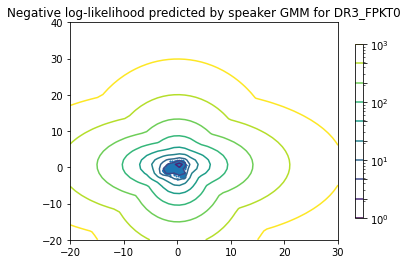

In [ ]:
# train a GMM model on speaker data and plot the GMM density estimation
# gaussian model
# display predicted scores by the model as a contour plot
from matplotlib.colors import LogNorm
from sklearn import mixture

random_speaker = 'DR3_FPKT0'

GMM_COMPONENTS_r = 5
gmm_r = GMM(n_components = GMM_COMPONENTS_r, covariance_type='diag', n_init = 3)
feature_vect = np.asarray(())

for aud_path in speakers_data[random_speaker]:
  sr, speaker_aud = read(aud_path)
  speaker_feat = extract_features(speaker_aud, sr)
  if feature_vect.size == 0:
    feature_vect = speaker_feat
  else:
    feature_vect = np.vstack((feature_vect, speaker_feat))

feature_vect = feature_vect[:, :2]
# train
gmm_r.fit(feature_vect)

x = np.linspace(-20.0, 30.0)
y = np.linspace(-20.0, 40.0)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -gmm_r.score_samples(XX)
Z = Z.reshape(X.shape)

CS = plt.contour(
    X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0), levels=np.logspace(0, 3, 10)
)
CB = plt.colorbar(CS, shrink=0.8, extend="both")
plt.scatter(feature_vect[:, 0], feature_vect[:, 1], 0.8)

plt.title(f"Negative log-likelihood predicted by speaker GMM for {random_speaker}")
plt.axis("tight")
plt.show()

In [ ]:
from re import S
from math import inf
from sklearn.metrics import accuracy_score
# test model
# given a speaker id, compare with all the audio of same speaker [same label], 
# and randomly sample some audio from other speakers, get accuracy for that speaker
import random, math

from scipy.optimize import brentq
from scipy.interpolate import interp1d
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from matplotlib.colors import LogNorm
from sklearn import mixture

from scipy.stats import norm
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from scipy.optimize import curve_fit

# gaussian fit
def gaussian(x, mean, amplitude, standard_deviation):
    return amplitude * np.exp( - (x - mean)**2 / (2*standard_deviation ** 2))

def calc_eer(y, y_score):
  fpr, tpr, thresholds = roc_curve(y, y_score, pos_label=1)

  eer = brentq(lambda x : 1. - x - interp1d(fpr, tpr)(x), 0., 1.)
  thresh = interp1d(fpr, thresholds)(eer)

  return eer, thresh

def test_model(speakers_data, gmm_speakers, speaker_id):
  # from speakers data, make test sets
  test_set = []
  labels = []
  # same speaker data, label 1
  for aud_p in speakers_data[speaker_id]:
    test_set.append([aud_p, 1])
    labels.append(1)
  for other_sp in speakers_data:
    if other_sp != speaker_id:
      aud_p = random.sample(speakers_data[other_sp], 1)[0]
      test_set.append([aud_p, 0])
      labels.append(0)

  # anchor audio [not needed]
  anchor_aud = speakers_data[speaker_id][0] # the first audio
  sr, a_aud = read(anchor_aud)
  anchor_feat = extract_features(a_aud, sr)

  # scoring
  pred_labels = []
  pred_scores = []
  pred_scores_0 = []
  pred_scores_1 = []
  for test in test_set:
    aud_p, lab = test
    sr, aud = read(aud_p)
    speaker_feat = extract_features(aud, sr)

    max_score = - inf
    predicted_speaker = None
    for spk in gmm_speakers:
      gmm = gmm_speakers[spk]
      score = np.array(gmm.score(speaker_feat)).sum()
      if score > max_score:
        max_score = score
        predicted_speaker = spk
      if spk == speaker_id:
        pred_scores.append(score)
        if lab == 1:
          pred_scores_1.append(score)
        else:
          pred_scores_0.append(score)
    
    if predicted_speaker == speaker_id:
      pred_labels.append(1)
    else:
      pred_labels.append(0)
  acc = accuracy_score(labels, pred_labels)
  eer, th = calc_eer(labels, pred_scores)
  print(f"accuracy score for {speaker_id}: {acc * 100.}%")
  print(f"eer score for {speaker_id}: {eer * 100.}% with threshold {th}")

  print(classification_report(labels, pred_labels))

  # Get ROC curve FPR and TPR from true labels vs score values
  fpr, tpr, _ = roc_curve(labels, pred_scores)

  # Calculate ROC Area Under the Curve (AUC) from FPR and TPR data points
  roc_auc = auc(fpr, tpr)

  # Calculate precision and recall from true labels vs score values
  precision, recall, _ = precision_recall_curve(labels, pred_scores)

  plt.figure(figsize=(8, 3))

  plt.subplot(1,2,1)
  lw = 2
  plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve')
  plt.legend(loc="lower right")
  plt.grid(True)

  plt.subplot(1,2,2)
  plt.step(recall, precision, color='orange', where='post')
  # plt.fill_between(recall, precision, step='post', alpha=0.5, color='orange')
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.ylim([0.0, 1.05])
  plt.xlim([0.0, 1.0])
  plt.title('Precision Recall Curve')
  plt.grid(True)

  plt.show()

  # try:
  #   n = min(len(pred_scores_0), len(pred_scores_1))
  #   # negative
  #   bin_heights, bin_borders, _ = plt.hist(pred_scores_0[:n], color = 'r', bins='auto', label='imposter')
  #   bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
  #   popt, _ = curve_fit(gaussian, bin_centers, bin_heights, p0=[1., 0., 1.])

  #   x_interval_for_fit = np.linspace(bin_borders[0], bin_borders[-1], 1000)
  #   plt.plot(x_interval_for_fit, gaussian(x_interval_for_fit, *popt), label='imposter_curve')

  #   # positive
  #   bin_heights, bin_borders, _ = plt.hist(pred_scores_1[:n], color = 'b', bins='auto', label='genuine')
  #   bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
  #   popt, _ = curve_fit(gaussian, bin_centers, bin_heights, p0=[1., 0., 1.])

  #   x_interval_for_fit = np.linspace(bin_borders[0], bin_borders[-1], 1000)
  #   plt.plot(x_interval_for_fit, gaussian(x_interval_for_fit, *popt), label='genuine_curve')
  #   plt.legend()
  #   plt.show()
  # except:
  #   print("The hist was not plotted.")
  return acc, eer, labels, pred_labels, pred_scores

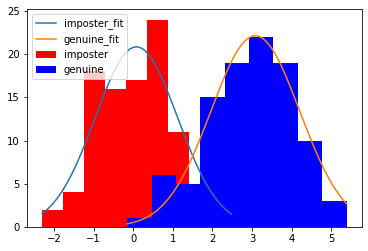

In [ ]:
from scipy.optimize import curve_fit
x = np.random.randn(100)
y = 3 + np.random.randn(100)
def gaussian(x, mean, amplitude, standard_deviation):
    return amplitude * np.exp( - (x - mean)**2 / (2*standard_deviation ** 2))

# negative
bin_heights, bin_borders, _ = plt.hist(x, color = 'r', bins='auto', label='imposter')
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
popt, _ = curve_fit(gaussian, bin_centers, bin_heights, p0=[1., 0., 1.])

x_interval_for_fit = np.linspace(bin_borders[0], bin_borders[-1], 1000)
plt.plot(x_interval_for_fit, gaussian(x_interval_for_fit, *popt), label='imposter_fit')

# positive
bin_heights, bin_borders, _ = plt.hist(y, color = 'b', bins='auto', label='genuine')
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
popt, _ = curve_fit(gaussian, bin_centers, bin_heights, p0=[1., 0., 1.])

x_interval_for_fit = np.linspace(bin_borders[0], bin_borders[-1], 1000)
plt.plot(x_interval_for_fit, gaussian(x_interval_for_fit, *popt), label='genuine_fit')
plt.legend()
plt.show()

accuracy score for DR8_FCMH1: 100.0%
eer score for DR8_FCMH1: 9.999999999999996% with threshold -7.395230584639057
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       167
           1       1.00      1.00      1.00        10

    accuracy                           1.00       177
   macro avg       1.00      1.00      1.00       177
weighted avg       1.00      1.00      1.00       177



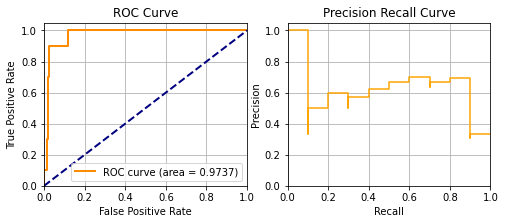

In [ ]:
acc, eer, _, _, _ = test_model(speakers_data, gmm_speakers, 'DR8_FCMH1')

In [ ]:
# plotting in 2-d for visualization
# do feature extraction, manifold, and 3d plot
from sklearn import manifold

all_features = []
all_labs = []

for speaker_id in tqdm(speakers_data):

  for aud_path in speakers_data[speaker_id]:
    sr, speaker_aud = read(aud_path)
    speaker_feat = extract_features(speaker_aud, sr)
    # print(speaker_feat.shape)
    n = speaker_feat.shape[0]
    total_mid_comp = 150
    c_fv = speaker_feat[ n // 2 - total_mid_comp //2 : n // 2 + total_mid_comp //2 , :].flatten() # central features
    if c_fv.shape[0] == 6000: # 150 [total_mid_comp] x 40 [feature_dim]
      all_features.append(c_fv)
      all_labs.append(speaker_id)

all_features = np.array(all_features)
print(all_features.shape)
print(len(all_labs))

100%|██████████| 168/168 [00:36<00:00,  4.59it/s]


(1666, 6000)
1666


In [ ]:
# generate colors
import random

color_map = {}
for spk in speakers_data:
  color_map[spk] = [(random.randint(0,255)/255., random.randint(0,255)/255., random.randint(0,255)/255.)]

In [ ]:
print(color_map)

{'DR3_FPKT0': [(0.33725490196078434, 0.12941176470588237, 0.403921568627451)], 'DR3_MJJG0': [(0.4235294117647059, 0.32941176470588235, 0.6627450980392157)], 'DR3_FCMH0': [(0.6235294117647059, 0.2627450980392157, 0.050980392156862744)], 'DR3_MWJG0': [(0.9058823529411765, 0.35294117647058826, 0.8901960784313725)], 'DR3_MTAA0': [(0.9647058823529412, 0.8705882352941177, 0.00392156862745098)], 'DR3_MMDH0': [(0.027450980392156862, 0.9764705882352941, 0.8784313725490196)], 'DR3_MHPG0': [(0.7098039215686275, 0.21568627450980393, 0.7215686274509804)], 'DR3_MLNT0': [(0.8431372549019608, 0.11372549019607843, 0.6078431372549019)], 'DR3_MKCH0': [(0.596078431372549, 0.792156862745098, 0.9098039215686274)], 'DR3_MCTW0': [(0.054901960784313725, 0.34509803921568627, 0.596078431372549)], 'DR3_MMAB0': [(0.08627450980392157, 0.5568627450980392, 0.3764705882352941)], 'DR3_MBWM0': [(0.21568627450980393, 0.7137254901960784, 0.06274509803921569)], 'DR3_MGJF0': [(0.17254901960784313, 0.3843137254901961, 0.7568

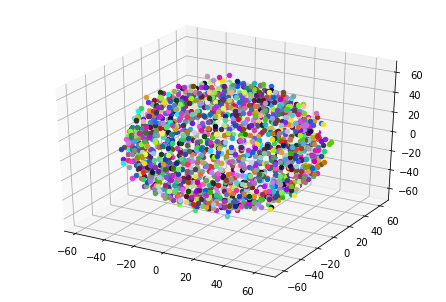

In [ ]:
# manifold learning
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Y = manifold.MDS(n_components = 3, max_iter=100, n_init=1).fit_transform(all_features)

fig = plt.figure()
ax = Axes3D(fig)

for j in range(len(all_labs)):
  ax.scatter(Y[j,0],Y[j,1],Y[j,2], color = color_map[all_labs[j]])
plt.show()

accuracy score for DR3_FPKT0: 100.0%
eer score for DR3_FPKT0: 11.377245508993903% with threshold -7.957904145487239
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       167
           1       1.00      1.00      1.00        10

    accuracy                           1.00       177
   macro avg       1.00      1.00      1.00       177
weighted avg       1.00      1.00      1.00       177



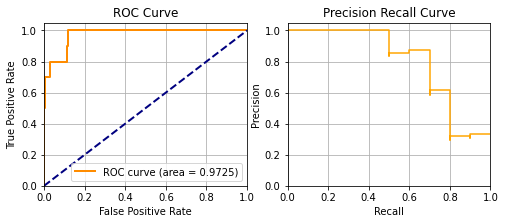

accuracy score for DR3_MJJG0: 98.87005649717514%
eer score for DR3_MJJG0: 13.7724550898456% with threshold -7.269569053999492
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       167
           1       0.90      0.90      0.90        10

    accuracy                           0.99       177
   macro avg       0.95      0.95      0.95       177
weighted avg       0.99      0.99      0.99       177



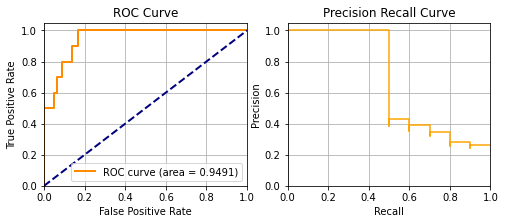

accuracy score for DR3_FCMH0: 99.43502824858757%
eer score for DR3_FCMH0: 1.1976047904198035% with threshold -6.315210336766802
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       167
           1       1.00      0.90      0.95        10

    accuracy                           0.99       177
   macro avg       1.00      0.95      0.97       177
weighted avg       0.99      0.99      0.99       177



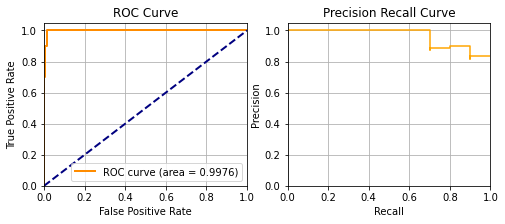

accuracy score for DR3_MWJG0: 99.43502824858757%
eer score for DR3_MWJG0: 10.000000000018641% with threshold -7.284514182552126
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       167
           1       1.00      0.90      0.95        10

    accuracy                           0.99       177
   macro avg       1.00      0.95      0.97       177
weighted avg       0.99      0.99      0.99       177



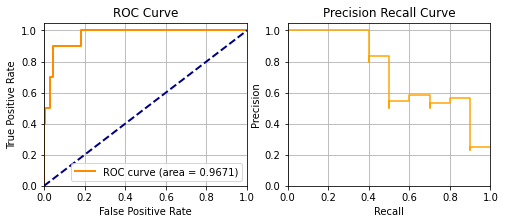

accuracy score for DR3_MTAA0: 99.43502824858757%
eer score for DR3_MTAA0: 4.790419161838868% with threshold -6.471338153605574
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       167
           1       1.00      0.90      0.95        10

    accuracy                           0.99       177
   macro avg       1.00      0.95      0.97       177
weighted avg       0.99      0.99      0.99       177



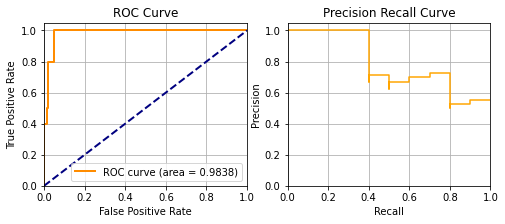

------------------------------------------------------------------------------------
------------------------------------------------------------------------------------
------------------------------------------------------------------------------------
Final average test accuracy: 2.959375840731773%
Final average test EER: 0.244867408042362%
Final accuracy score for all speakers: 99.43502824858757%
Final eer score for all speakers: 9.131652661064422%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       835
           1       0.98      0.92      0.95        50

    accuracy                           0.99       885
   macro avg       0.99      0.96      0.97       885
weighted avg       0.99      0.99      0.99       885



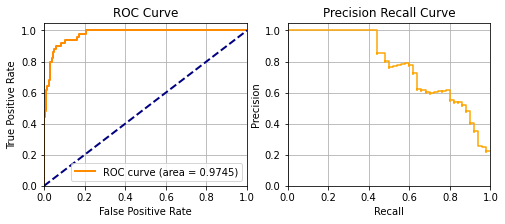

In [ ]:
# testing for all speakers
tot_acc = 0.0
tot_eer = 0.0

all_labs = []
all_pred_labs = []
all_pred_scores = []

dummy_run = True # make it False for full run

for j, spk in enumerate(speakers_data):
  if dummy_run and j == 5:
    break
  acc, eer, labs, pred_labs, pred_scores = test_model(speakers_data, gmm_speakers, spk)
  tot_acc += acc
  tot_eer += eer
  all_labs.extend(labs)
  all_pred_labs.extend(pred_labs)
  all_pred_scores.extend(pred_scores)

print('------------------------------------------------------------------------------------')
print('------------------------------------------------------------------------------------')
print('------------------------------------------------------------------------------------')

print(f"Final average test accuracy: {tot_acc/len(list(speakers_data.keys()))*100.}%")
print(f"Final average test EER: {tot_eer/len(list(speakers_data.keys()))*100.}%")

acc = accuracy_score(all_labs, all_pred_labs)
eer, th = calc_eer(all_labs, all_pred_scores)
print(f"Final accuracy score for all speakers: {acc * 100.}%")
print(f"Final eer score for all speakers: {eer * 100.}%")

print(classification_report(all_labs, all_pred_labs))

# Get ROC curve FPR and TPR from true labels vs score values
fpr, tpr, _ = roc_curve(all_labs, all_pred_scores)

# Calculate ROC Area Under the Curve (AUC) from FPR and TPR data points
roc_auc = auc(fpr, tpr)

# Calculate precision and recall from true labels vs score values
precision, recall, _ = precision_recall_curve(all_labs, all_pred_scores)

plt.figure(figsize=(8, 3))

plt.subplot(1,2,1)
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)

plt.subplot(1,2,2)
plt.step(recall, precision, color='orange', where='post')
# plt.fill_between(recall, precision, step='post', alpha=0.5, color='orange')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision Recall Curve')
plt.grid(True)

plt.show()